* Consider only the below columns and prepare a prediction model for predicting Price.

* Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


## 1.Importing Libraries

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split

## 2.Import Dataset

In [15]:
toyoto = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyoto

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## 3.Data Understanding || Data Preparation

In [16]:
toyoto.shape

(1436, 38)

In [17]:
toyoto.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [18]:
toyoto.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [20]:
toyoto.describe(include='all')

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,NaN,NaN,NaN,NaN,NaN,Petrol,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,107,NaN,NaN,NaN,NaN,NaN,1264,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,721.555014,NaN,10730.824513,55.947075,5.548747,1999.625348,68533.259749,NaN,101.502089,0.674791,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,NaN,3626.964585,18.599988,3.354085,1.540722,37506.448872,NaN,14.981080,0.468616,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,NaN,4350.000000,1.000000,1.000000,1998.000000,1.000000,NaN,69.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,NaN,8450.000000,44.000000,3.000000,1998.000000,43000.000000,NaN,90.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,NaN,9900.000000,61.000000,5.000000,1999.000000,63389.500000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,NaN,11950.000000,70.000000,8.000000,2001.000000,87020.750000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000


In [21]:
toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [25]:
toyoto_data = toyoto[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyoto_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [31]:
toyoto_data1 = toyoto_data.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'QT','cc':'CC'})
toyoto_data1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [30]:
toyoto_data1.shape

(1436, 9)

In [32]:
toyoto_data1[toyoto_data1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [33]:
toyoto_data2=toyoto_data1.drop_duplicates().reset_index(drop=True)
toyoto_data2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [34]:
toyoto_data2.shape

(1435, 9)

In [36]:
toyoto_data2.describe(include='all')

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [37]:
toyoto_data2.skew()

Price      1.696579
Age       -0.825567
KM         1.017023
HP         0.957833
CC        27.452196
Doors     -0.075056
Gears      2.282921
QT         1.995336
Weight     3.116518
dtype: float64

In [49]:
toyoto_data2.kurtosis()

Price       3.729769
Age        -0.076573
KM          1.688525
HP          8.845659
CC        931.434173
Doors      -1.874887
Gears      37.675443
QT          4.329036
Weight     19.741527
dtype: float64

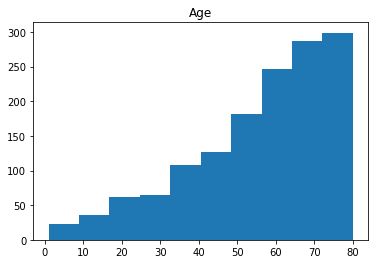

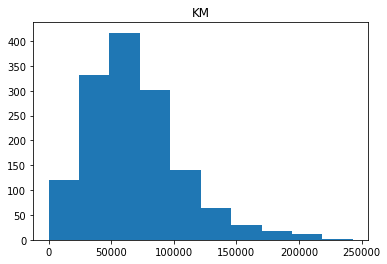

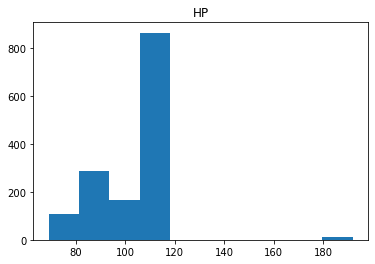

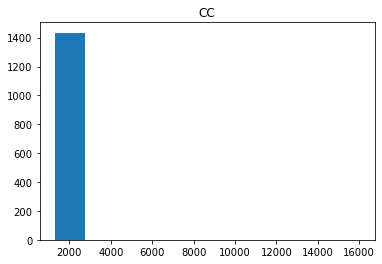

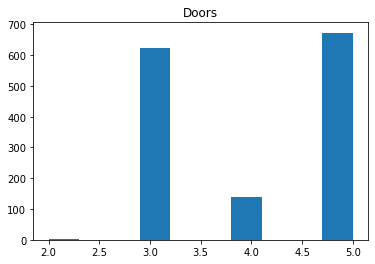

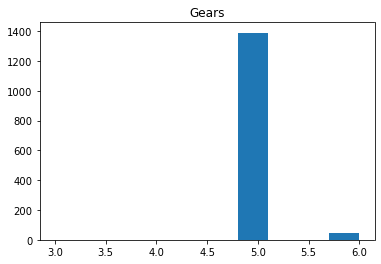

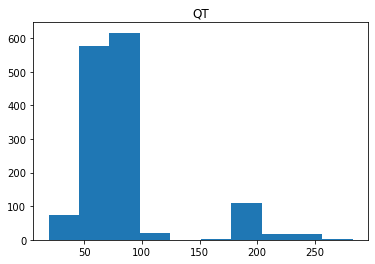

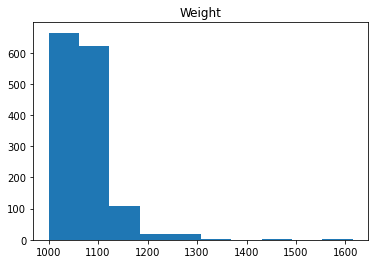

In [41]:
#Histogram
plt.title('Age')
plt.hist(x='Age',data=toyoto_data2)
plt.show()
plt.title('KM')
plt.hist(x='KM',data=toyoto_data2)
plt.show()
plt.title('HP')
plt.hist(x='HP',data=toyoto_data2)
plt.show()
plt.title('CC')
plt.hist(x='CC',data=toyoto_data2)
plt.show()
plt.title('Doors')
plt.hist(x='Doors',data=toyoto_data2)
plt.show()
plt.title('Gears')
plt.hist(x='Gears',data=toyoto_data2)
plt.show()
plt.title('QT')
plt.hist(x='QT',data=toyoto_data2)
plt.show()
plt.title('Weight')
plt.hist(x='Weight',data=toyoto_data2)
plt.show()

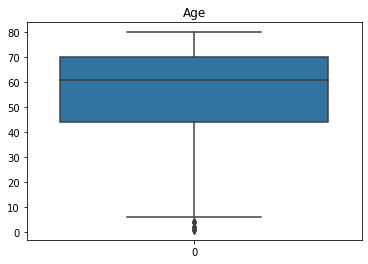

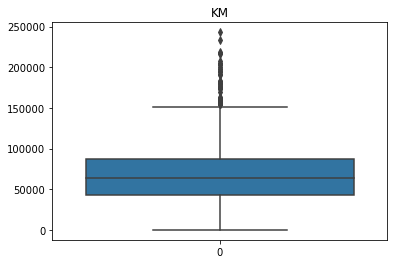

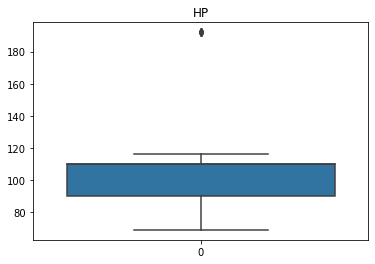

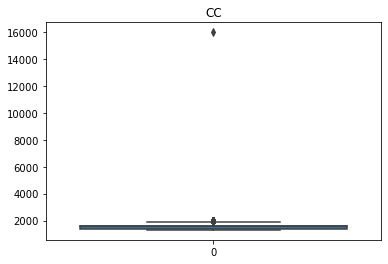

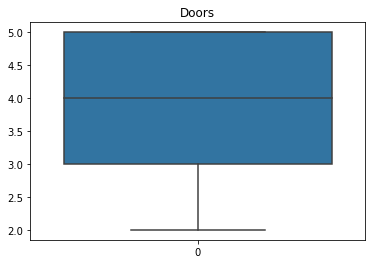

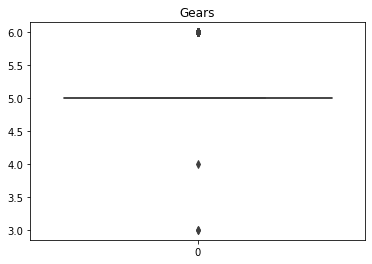

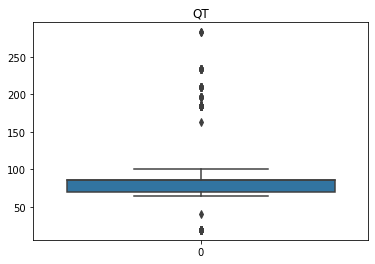

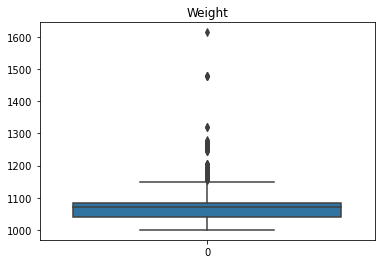

In [42]:
#Boxplot To Find the outliers
plt.title('Age')
sns.boxplot(data=toyoto_data2['Age'])
plt.show()
plt.title('KM')
sns.boxplot(data=toyoto_data2['KM'])
plt.show()
plt.title('HP')
sns.boxplot(data=toyoto_data2['HP'])
plt.show()
plt.title('CC')
sns.boxplot(data=toyoto_data2['CC'])
plt.show()
plt.title('Doors')
sns.boxplot(data=toyoto_data2['Doors'])
plt.show()
plt.title('Gears')
sns.boxplot(data=toyoto_data2['Gears'])
plt.show()
plt.title('QT')
sns.boxplot(data=toyoto_data2['QT'])
plt.show()
plt.title('Weight')
sns.boxplot(data=toyoto_data2['Weight'])
plt.show()

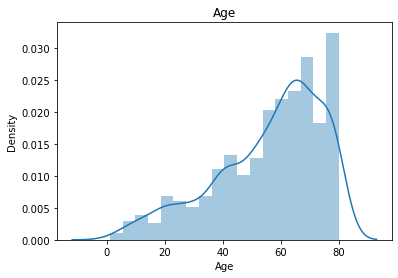

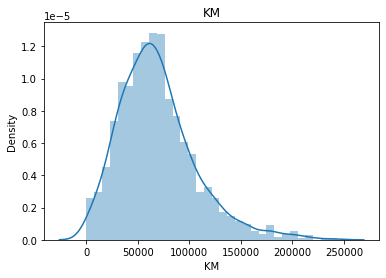

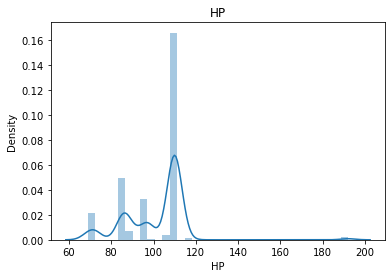

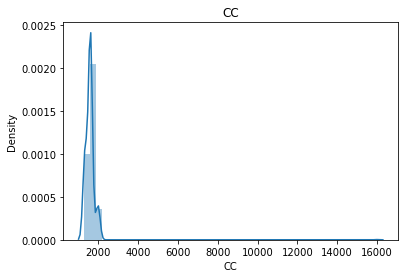

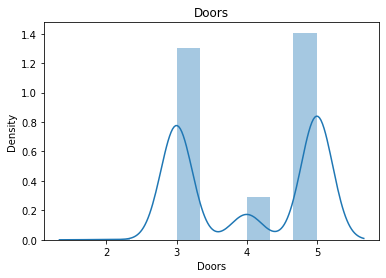

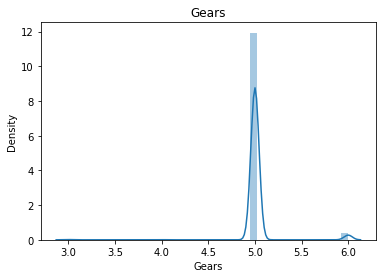

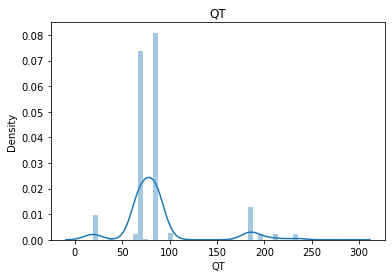

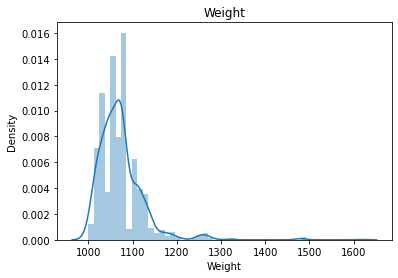

In [47]:
#Distplot
plt.title('Age')
sns.distplot(toyoto_data2['Age'])
plt.show()
plt.title('KM')
sns.distplot(toyoto_data2['KM'])
plt.show()
plt.title('HP')
sns.distplot(toyoto_data2['HP'])
plt.show()
plt.title('CC')
sns.distplot(toyoto_data2['CC'])
plt.show()
plt.title('Doors')
sns.distplot(toyoto_data2['Doors'])
plt.show()
plt.title('Gears')
sns.distplot(toyoto_data2['Gears'])
plt.show()
plt.title('QT')
sns.distplot(toyoto_data2['QT'])
plt.show()
plt.title('Weight')
sns.distplot(toyoto_data2['Weight'])
plt.show()

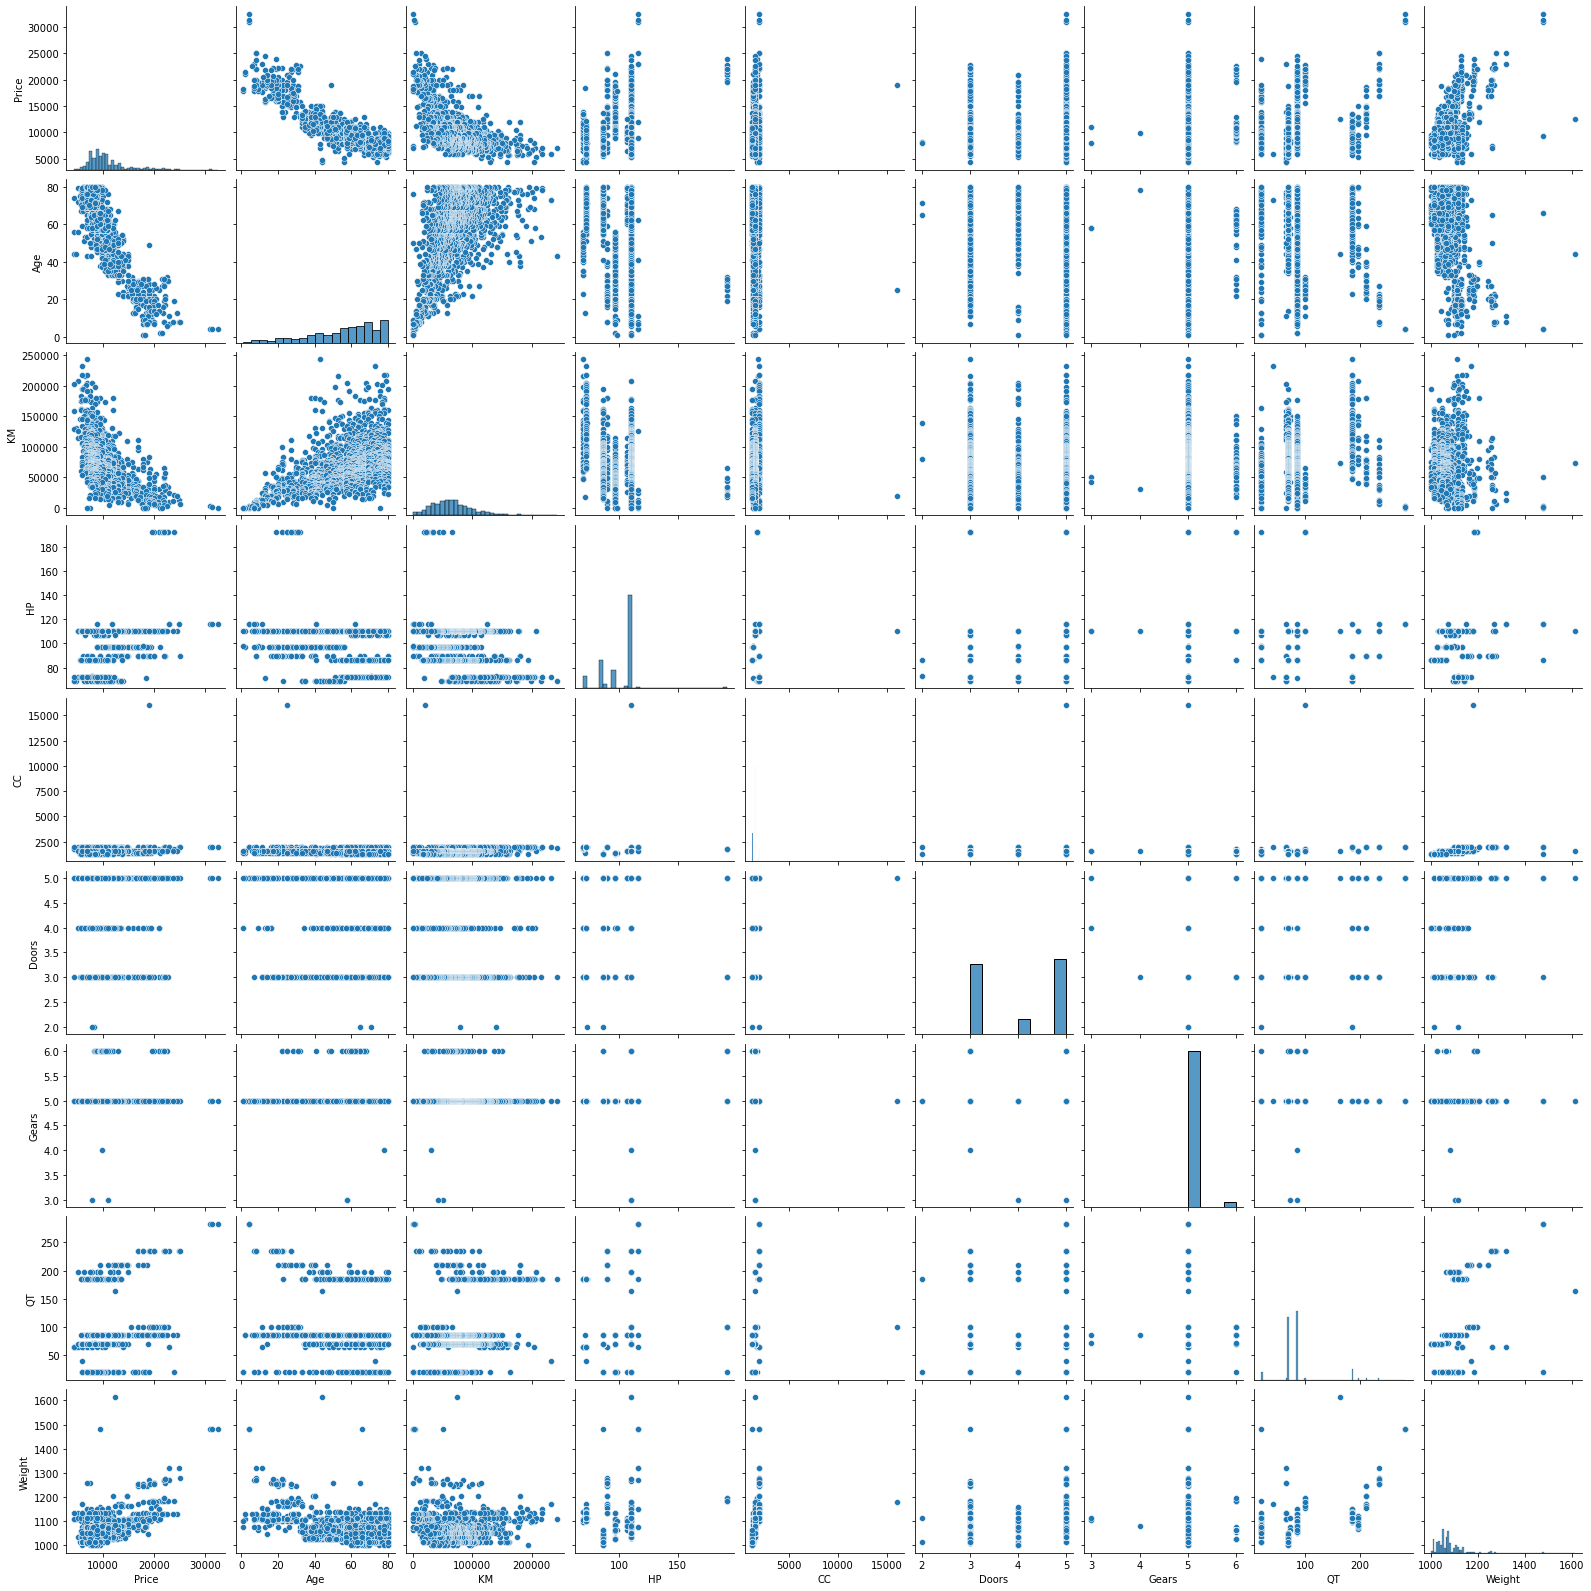

In [50]:
sns.pairplot(toyoto_data2)
plt.show()

In [51]:
toyoto_data2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


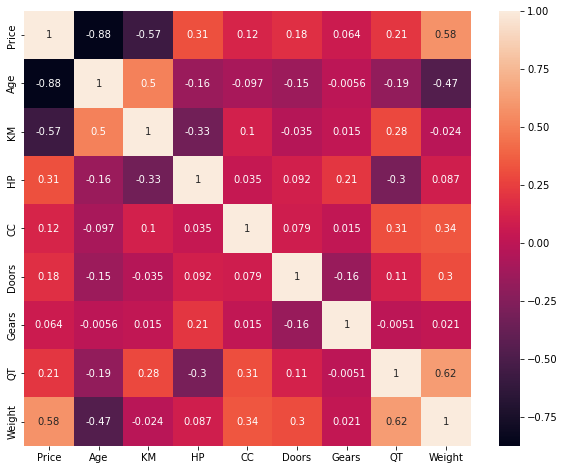

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(toyoto_data2.corr(),annot=True)
plt.show()

In [54]:
toyoto_data2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [62]:
X=toyoto_data2[['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight']]
X.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [63]:
y = toyoto_data2[['Price']]
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


## 5.Model Building || Model Training

# MODEL-1 OLS Method

In [66]:
linear_model_1 = smf.ols(formula='Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyoto_data2).fit()
linear_model_1

In [67]:
#Finding Co-efficients
linear_model_1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [68]:
#Finding tvalues and Pvalues
linear_model_1.tvalues,linear_model_1.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [69]:
#Finding Rsquared values
linear_model_1.rsquared,linear_model_1.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [70]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:29:25   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
linear_model_1.predict(X).head()

0    16791.958871
1    16253.800414
2    16779.635210
3    16405.789389
4    16200.217277
dtype: float64

### Model Validation

### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

### 1) Collinearity Problem Check

In [74]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyoto_data2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyoto_data2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyoto_data2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyoto_data2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyoto_data2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyoto_data2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyoto_data2).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyoto_data2).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


##  None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

### 2) Residual Analysis
### Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

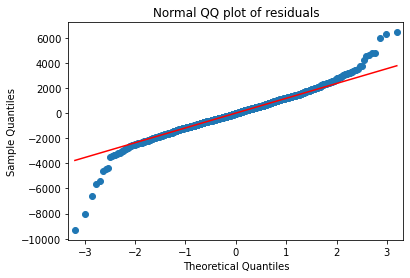

In [77]:
#Test for normality of residual(qqplot)
qqplot= sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal QQ plot of residuals')
plt.show()

In [90]:
list(np.where(linear_model_1.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [91]:
list(np.where(linear_model_1.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [101]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) :
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

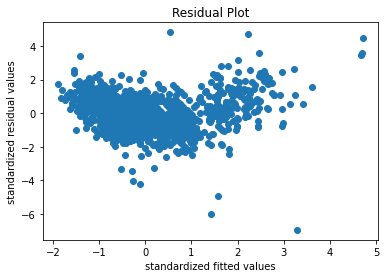

In [102]:
plt.scatter(standard_values(linear_model_1.fittedvalues),standard_values(linear_model_1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [92]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


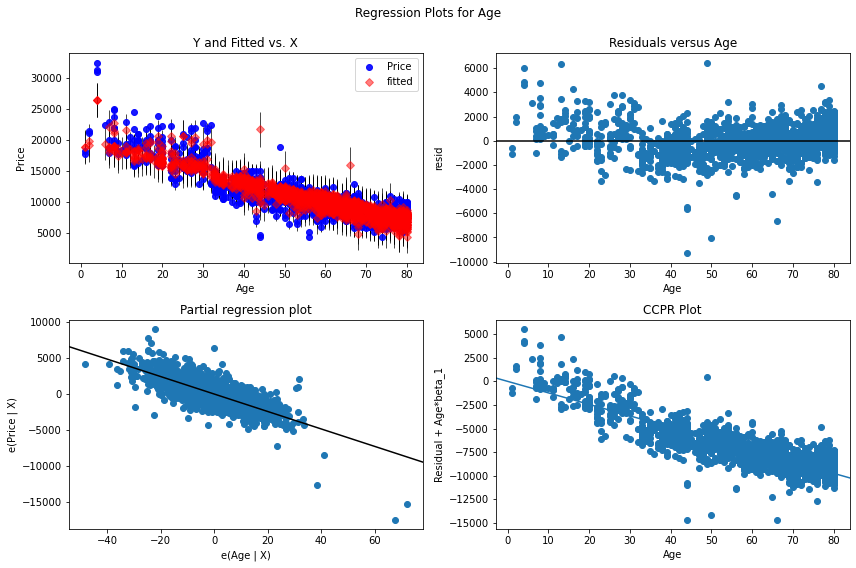

In [93]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'Age',fig=fig)
plt.show()

eval_env: 1


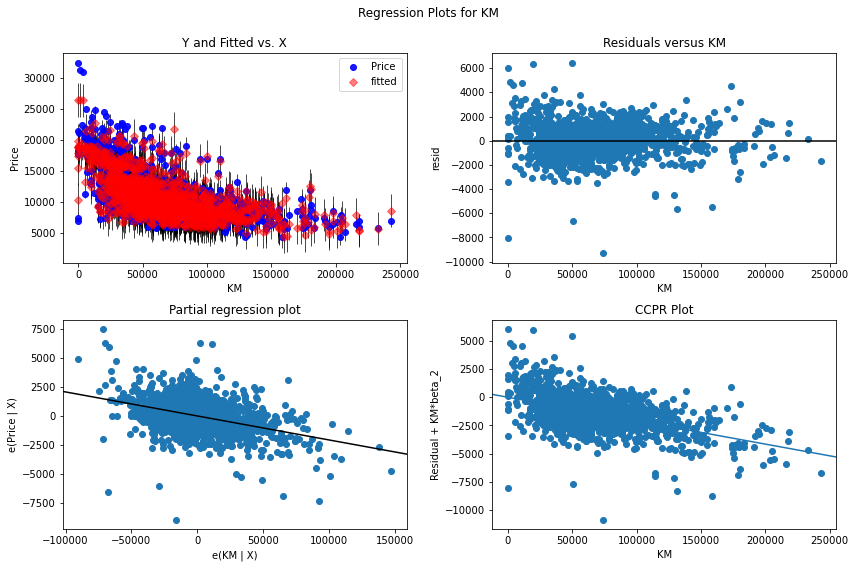

In [94]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'KM',fig=fig)
plt.show()

eval_env: 1


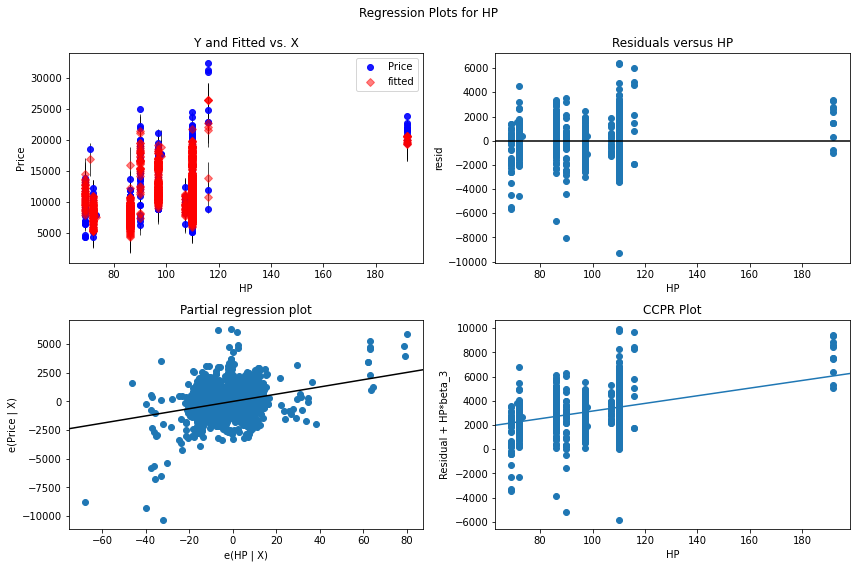

In [95]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'HP',fig=fig)
plt.show()

eval_env: 1


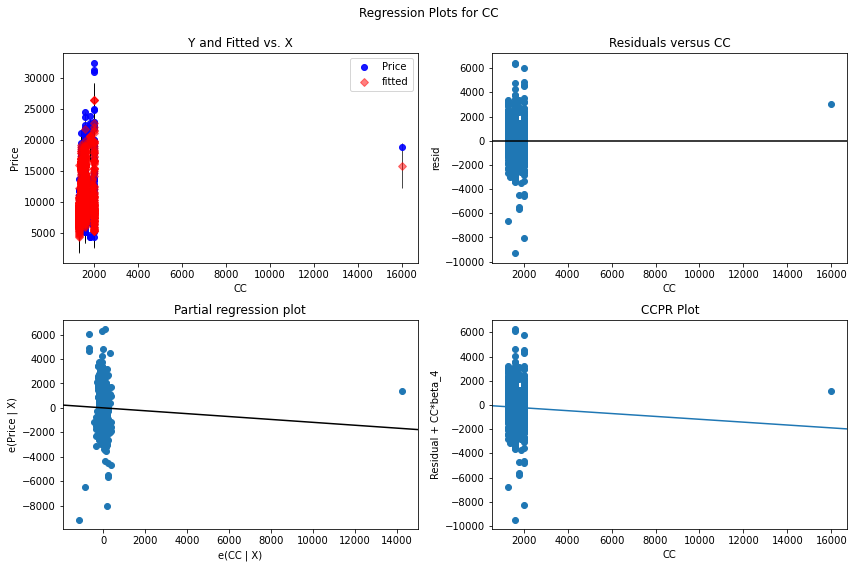

In [96]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'CC',fig=fig)
plt.show()

eval_env: 1


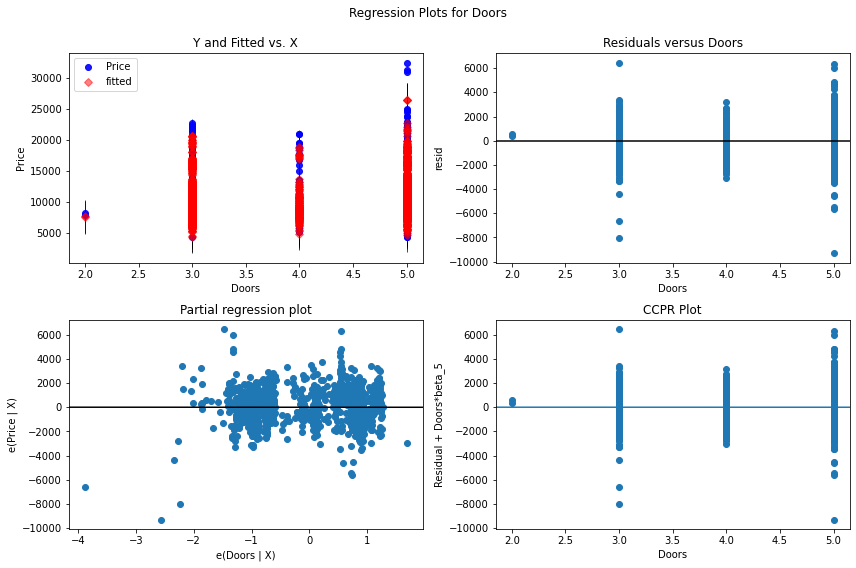

In [97]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'Doors',fig=fig)
plt.show()

eval_env: 1


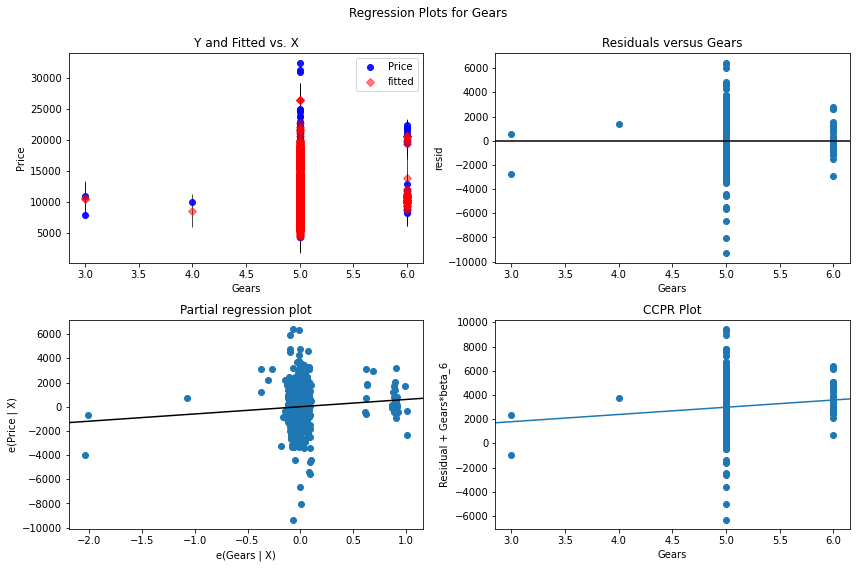

In [98]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'Gears',fig=fig)
plt.show()

eval_env: 1


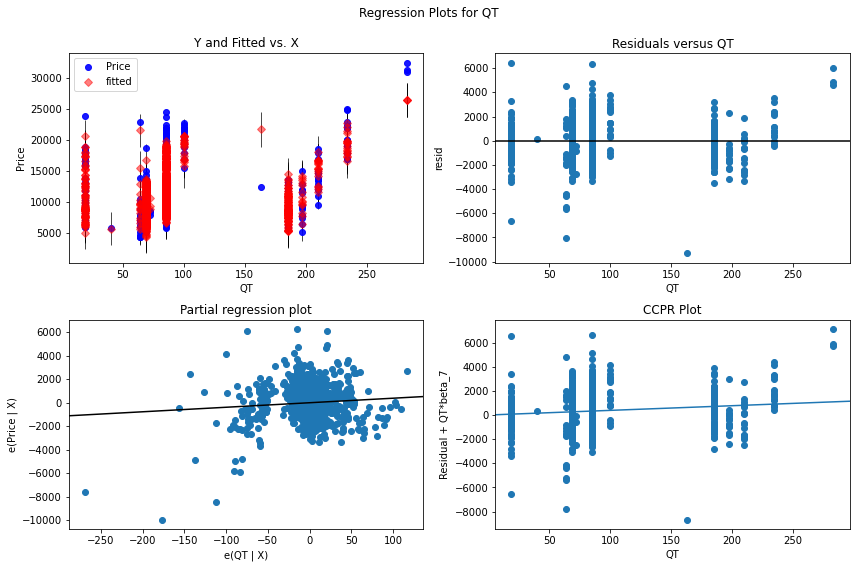

In [99]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'QT',fig=fig)
plt.show()

eval_env: 1


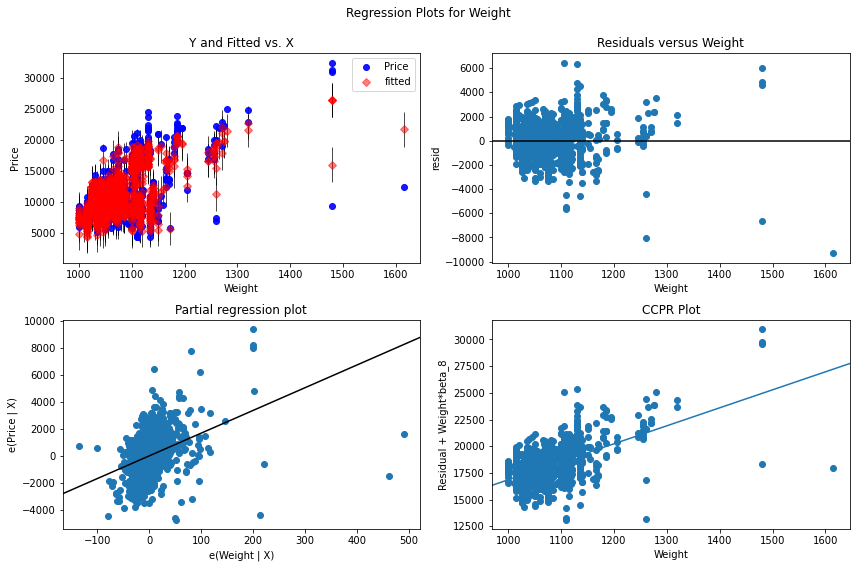

In [100]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(linear_model_1,'Weight',fig=fig)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [103]:
#cooks distance to find outliers
model_influence = linear_model_1.get_influence()
(c, _) = model_influence.cooks_distance

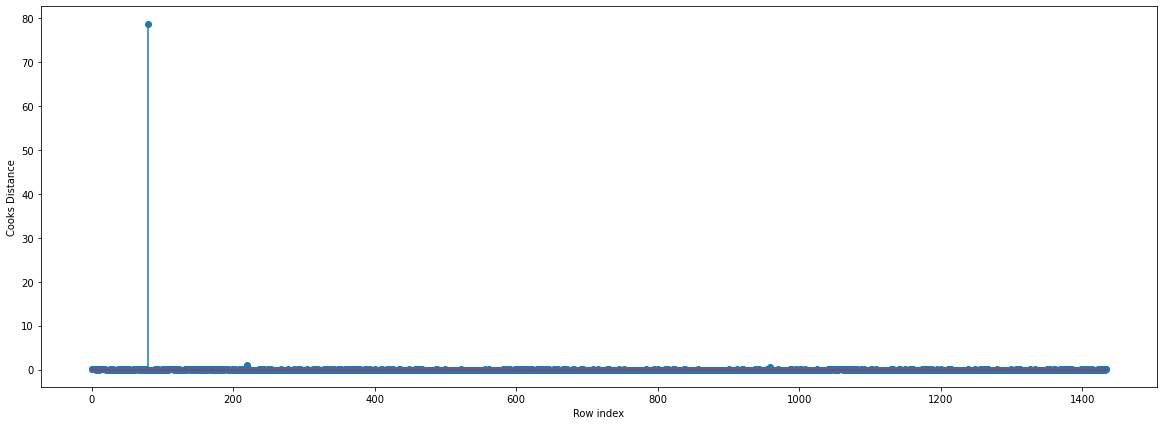

In [105]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyoto_data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [106]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224851)

<Figure size 1800x1440 with 0 Axes>

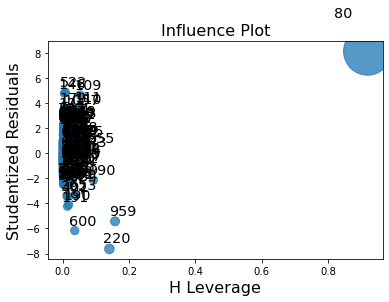

In [115]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
plt.figure(figsize=(25,20))
influence_plot(linear_model_1)
plt.show()

In [118]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyoto_data2.shape[1]
n=toyoto_data2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [119]:
toyoto_data2[toyoto_data2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the model-1

In [121]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyoto_data3 = toyoto_data2.drop(index=80,axis=0)
toyoto_data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [124]:
linear_model_2 = smf.ols(formula='Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyoto_data3).fit()
linear_model_2

In [125]:
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:11:45   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model-3

In [127]:
X

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025
1431,72,19000,86,1300,3,5,69,1015
1432,71,17016,86,1300,3,5,69,1015
1433,70,16916,86,1300,3,5,69,1015


In [128]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [133]:
#Training data
X_train.shape,y_train.shape

((1148, 8), (1148, 1))

In [134]:
#Test data
X_test.shape,y_test.shape

((287, 8), (287, 1))

In [136]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
linear_model_3 = smf.OLS(endog = y_train, exog = X_train).fit()

In [137]:
#Finding Co-efficients
linear_model_3.params

Age      -124.265303
KM         -0.018663
HP         39.815069
CC         -2.409863
Doors     -20.475700
Gears     148.387576
QT         13.853077
Weight     15.686601
dtype: float64

In [138]:
#Finding tvalues and Pvalues
linear_model_3.tvalues,linear_model_3.pvalues

(Age      -45.947812
 KM       -12.648231
 HP        11.713773
 CC        -6.901825
 Doors     -0.459463
 Gears      0.938614
 QT         8.898094
 Weight    17.550795
 dtype: float64,
 Age       1.090688e-261
 KM         2.079480e-34
 HP         5.254008e-30
 CC         8.502044e-12
 Doors      6.459890e-01
 Gears      3.481279e-01
 QT         2.186331e-18
 Weight     3.166458e-61
 dtype: float64)

In [139]:
#Finding Rsquared values
linear_model_3.rsquared,linear_model_3.rsquared_adj

(0.9860494061790177, 0.9859515072750108)

In [140]:
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.007e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                        0.00
Time:                        00:15:38   Log-Likelihood:                         -9889.7
No. Observations:                1148   AIC:                                  1.980e+04
Df Residuals:                    1140   BIC:                                  1.984e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -124.2653      2.704    -45.948      0.000    -129.572    -118.959
KM            -0.0187      0.001    -12.648      0.000      -0.022      -0.016
HP            39.8151      3.399     11.714      0.000      33.146      46.484
CC            -2.4099      0.349     -6.902      0.000      -3.095      -1.725
Doors        -20.4757     44.564     -0.459      0.646    -107.913      66.962
Gears        148.3876    158.092      0.939      0.348    -161.797     458.572
QT            13.8531      1.557      8.898      0.000      10.798      16.908
Weight        15.6866      0.894     17.551      0.000      13.933      17.440
==============================================================================
Omnibus:                      124.810   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              962.744
Skew:                          -0.108   Prob(JB):                    8.77e-210
Kurtosis:                       7.481   Cond. No.                     3.15e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R-Square value Tables from above models

In [144]:
value = {'Model':['linear_model_1' ,'linear_model_2' ,'linear_model_3'],'R-Squared Values':[linear_model_1.rsquared,linear_model_2.rsquared,linear_model_3.rsquared]}
value = pd.DataFrame(value)
value

,Model,R-Squared Values
0,linear_model_1,0.862520
1,linear_model_2,0.868116
2,linear_model_3,0.986049


## Model Predictions

In [141]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [143]:
# Manual Prediction of Price
linear_model_3.predict(new_data)

0    15305.418506
dtype: float64

In [149]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=linear_model_3.predict(X)
pred_y

0       16893.176799
1       16408.853388
2       16867.358801
3       16501.456613
4       16260.126871
            ...     
1430     9048.695429
1431     8547.849173
1432     8709.141860
1433     8835.273462
1434     9457.337369
Length: 1435, dtype: float64